## Basic Algorithms: Fibonacci

Another form of recursion is tree recursion. Consider computing a fibonacci sequence, in which each number is the sum of the previous two, with the first two taken to be 0 and 1.

### Recursive Fibonacci. 


We write Fibonacci recursively with the first two numbers as base cases.

![](https://mitpress.mit.edu/sicp/full-text/book/ch1-Z-G-13.gif)

(from SICP)

Signature: `def fib_recursive(n)`

In [1]:
def fib_recursive(n):
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib_recursive(n-1) + fib_recursive(n-2)

for i in [1, 2, 7, 13, 29, 33]:
    print(fib_recursive(i))

0
1
8
144
317811
2178309


### Q1. 

What are the space and time complexities of this implementation? Hint: think aboutthe number of items in a binary tree and its depth.

*your answer here*


Space complexities of this implementation is the height of execution tree. So for fib_recursive(n), the space complexities is $O(n)$.

Time complexitites of this implementation is the total number of nodes of execution tree.For each node, we need two units of time to compute it. So for fib_recursive(n), the time complexities is $O(2^n)$.
Base: $n$ = 1 is obvious

Assume $T(n-1)$ = $O(2n-1)$, therefore

$T(n) = T(n-1) + T(n-2) + O(1)$ which is equal to

$T(n) = O(2n-1) + O(2n-2) + O(1) = O(2n)$

### Dynamic Programming and Iteration

From Skiena
>..**dynamic programming**, which typically removes one element from the problem, solves the smaller problem, and then uses the solution to this smaller problem to add back the element in the proper way. **Divide-and-conquer** instead splits the problem in (say) halves, solves each half, then stitches the pieces back together to form a full solution.

>Dynamic programming is a technique for efficiently implementing a recursive algorithm by storing partial results. The trick is seeing whether the naive recursive algorithm computes the same subproblems over and over and over again. If so, storing the answer for each subproblems in a table to look up instead of recompute can lead to an efficient algorithm. Start with a recursive algorithm or definition. Only once we have a correct recursive algorithm do we worry about speeding it up by using a results matrix. Dynamic programming is generally the right method for optimization problems on combinatorial objects that have an inherent left to right order among components. Left-to-right objects includes: character strings, rooted trees, polygons, and integer sequences.

### Q2.

Here is an implementation of Fibonacci using dynamic programming: they key is to notice that the recurrence we used can be put into an iterative form and just stored in an ever increasing array. What is the space and time complexity here? What if you were somehow able to save the array outside of the function when u calculate `fib(M)` and subsequently had to calculate `fib(N)`, where $N>M$.

In [3]:
def fib_iterative(n):
    fibs=[]
    fibs.append(0)
    fibs.append(1)
    for i in range(2, n):
         fibs.append(fibs[i-1]+fibs[i-2])
    return fibs[n-1]

In [4]:
for i in [1, 2, 7,13,29,33]:
    print(fib_iterative(i))

0
1
8
144
317811
2178309


*your answer here*


- As we can see that there will be n number of values stored in the list of fibs ,space complexities of this implementation is $O(n)$.

- When analyzing the time complexities for this implementation, we should look the number of iteration of FOR loop. So for fib_recursive(n), the time complexities is $O(n)$. (look at the time to run the for loop)

If I were able to save the array outside of the function, then the values from fib(M) is immediately accessible. The space and time complexitites is O(N-M).

The memoization version will take O(n) time on first run, since each number is only computed once. However, in exchange, it also take O(n) memory for your current implementation (the n comes from storing the computed value, and also for the stack on the first run). If you run it many times, the time complexity will become O(M + q) where M is the max of all input n and q is the number of queries. The memory complexity will become O(M), which comes from the array which holds all the computed values.

### Recursive Fibonacci with cacheing

### Q3. 

Use `cache` and `call_counter` as decorators on `fib_recursive` and print the fibonacci numbers for 7,13,29, 33. What order should these decorators be called to make sure `call_counter` gets the actual number of calls to `fib_recursive`?

We've written the `cache` decorator for you. You have to write the `call_counter` decorator which takes the function as argument and using a `count_dictionary` whose keys are function names, counts the number of times the function is called.

In [3]:
def cache(f):
    """a single argument function whose values may be cached"""
    cache = {}
    def memoized_func(x):
        if x not in cache:
            cache[x] = f(x)
        return cache[x]
    memoized_func.__name__ = f.__name__
    return memoized_func
    

In [4]:
def call_counter(count_dictionary):
    def call_counter_decorator(func):
        def inner(*args, **kwargs):
            name = func.__name__
            if name not in count_dictionary:
                count_dictionary[name] = 1
            else:
                count_dictionary[name] += 1
            for element in args:
                name_func = func(element)
            return name_func
        return inner
    return call_counter_decorator


**we should reverse the orders of two decorators**

In [7]:
#CORRECT ORDER
ccounter={}
@cache
@call_counter(ccounter)
def fib_recursive(n):
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib_recursive(n-1) + fib_recursive(n-2)

for i in [7,13,29, 33]:
    print(i, fib_recursive(i), ccounter['fib_recursive'])

(7, 8, 7)
(13, 144, 13)
(29, 317811, 29)
(33, 2178309, 33)


### Q4.

What is the time and space complexity of the the memoized Fibonacci? HINT: assume evaluation happens left to right on sub-expressions, so that `fib_recursive(n-1)` side of the tree is evaluated first, and thus the tree is evaluated depth first, from left to right. What kind of pruning happens in the tree?

*your answer here*
- Time Complexity: O(n) , Space Complexity : O(n)

Regarding Pruning by Memorization, we can generalize the algorithm to 
Algorithm  

Fib(n)
- text{for t <-- 0 .. 1 do Memo[t] <-- t}
- for t <-- 2 .. n do Memo[t] <-- null \\                                
- return  F(n) 

Function  F(n)
- if Memo[n] = null then Memo[n] <-- F(n-1) + F(n-2)    
- return  Memo[n]

Recursion tree evaluated in post-order. Now all right sub-trees are pruned. Instead of re-solving a sub-instance, fetch its solution from 
the memo table Memo[0..n].
I draw a tree structure below:

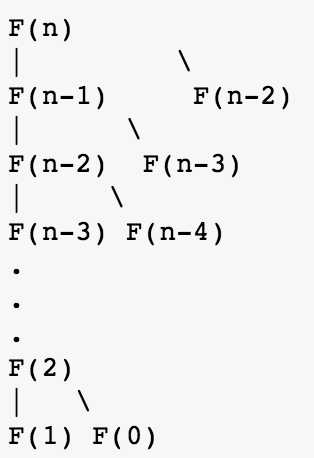

In [8]:
from IPython.display import Image
Image(filename='Prunning.png')

### Q5.

Do you really need to store the entire array in the dynamic programming implementation? Isnt it enough to have only saved the previous two Fibonacci numbers? Implement such an algorithm in `fib_iterative2(n)`. What is its space and time complexity? How is the time complexity different from that of the previous iterative attempt?

In [56]:
#your code here
def fib_iterative2(n):
    if (n <= 0): return -1
    elif (n == 1): return 0
    elif (n == 2): return 1
    fibs = [0, 1]                                                                                           
    for f in range(0, n-2):                                                                                      
        fibs.append(fibs[-1] + fibs[-2])
        print(fibs)
    return fibs[n-1]

In [57]:
print(fib_iterative2(5))  #0,1,1,2,3,5,8,13,21

[0, 1, 1]
[0, 1, 1, 2]
[0, 1, 1, 2, 3]
3


*your answer here*

- Time Complexity: O(n) , Space Complexity : O(n)

### Q6.

Write an algorithm for insertion sort.

![](https://camo.githubusercontent.com/8f6fedc10da579f13b22b949f6ad29255b6d721f/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30662f496e73657274696f6e2d736f72742d6578616d706c652d33303070782e676966)

(from wikipedia)

The algorithm is also illustrated here: http://cs.armstrong.edu/liang/animation/web/InsertionSort.html and may be described thus:

Insertion sort is a method for sorting that starts with a single element (thus forming a trivially sorted list) and then incrementally inserts the remaining elements so that the list stays sorted.

Talk about the best, worst and average complexity of insertion sort. Use the A=[5,2,1,3,8,6,9] to show your code!

*your answer here*

In [9]:
def insertionsort(alist):
    for index in range(1,len(alist)):
        currentvalue = alist[index]
        position = index
        
        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1
        alist[position]=currentvalue
    return(alist)


In [10]:
A=[5,2,1,3,8,6,9] 
insertionsort(A)

[1, 2, 3, 5, 6, 8, 9]

First we can randomly pick one item from the list and treat it as a sorted list of 1 item. For each new item that will be inserted, we can think as to insert this value back into the previous sublist such that the sorted sublist is one item larger. So it always maintains a sorted sublist in the lower positions of the list.

We begin by assuming that a list with one item (position 0) is already sorted. On each pass, one for each item 1 through $n-1$, the current item is checked against those in the already sorted sublist. As we look back into the already sorted sublist, we shift those items that are greater to the right. When we reach a smaller item or the end of the sublist, the current item can be inserted.

The implementation of Function **insertionsort** shows that there are again n−1 passes to sort n items. The iteration starts at position 1 and moves through position n−1, as these are the items that need to be inserted back into the sorted sublists. Line 8 (*alist[position]=alist[position-1]*) performs the shift operation that moves a value up one position in the list, making room behind it for the insertion.

The maximum number of comparisons for an insertion sort is the sum of the first n−1integers. Again, this is $O(n^2)$. However, in the best case, only one comparison needs to be done on each pass. This would be the case for an already sorted list.

One note about shifting versus exchanging is also important. In general, a shift operation requires approximately a third of the processing work of an exchange since only one assignment is performed. In benchmark studies, insertion sort will show very good performance.